In [88]:
%matplotlib qt5
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mne.__version__

'0.18.2'

In [89]:
data = np.genfromtxt('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/test.csv', delimiter=',').transpose()
print(data)
data = data / 1000

[[104. 102. 101. ...  -8.  -8.  -9.]
 [ 96.  94.  93. ...  -5.  -5.  -5.]
 [ 94.  92.  91. ... -12. -13. -13.]
 ...
 [ 99. 100.  98. ...  -9. -10. -10.]
 [ 99.  99.  98. ...   3.   4.   5.]
 [ 96.  97.  96. ...  10.  11.  13.]]


In [90]:
channel_names = [
    'Fp1',
    'Fp2',
    'F3',
    'F4',
    'F7',
    'F8',
    'C3',
    'C4',
    'P3',
    'P4',
    'O1',
    'O2',
    'T3',
    'T4',
    'T5',
    'T6',
    'Fz',
    'Cz',
    'Pz'
]

channel_types = [
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg',
    'eeg'
]

sfreq = 250

info = mne.create_info(channel_names, sfreq, ch_types=channel_types)

raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=19, n_times=58820
    Range : 0 ... 58819 =      0.000 ...   235.276 secs
Ready.


In [91]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, F7, F8, C3, C4, P3, ...
    chs : list | 19 items (EEG: 19)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 19
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

['EGI_256', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'biosemi128', 'biosemi16', 'biosemi160', 'biosemi256', 'biosemi32', 'biosemi64', 'easycap-M1', 'easycap-M10', 'mgh60', 'mgh70', 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed']


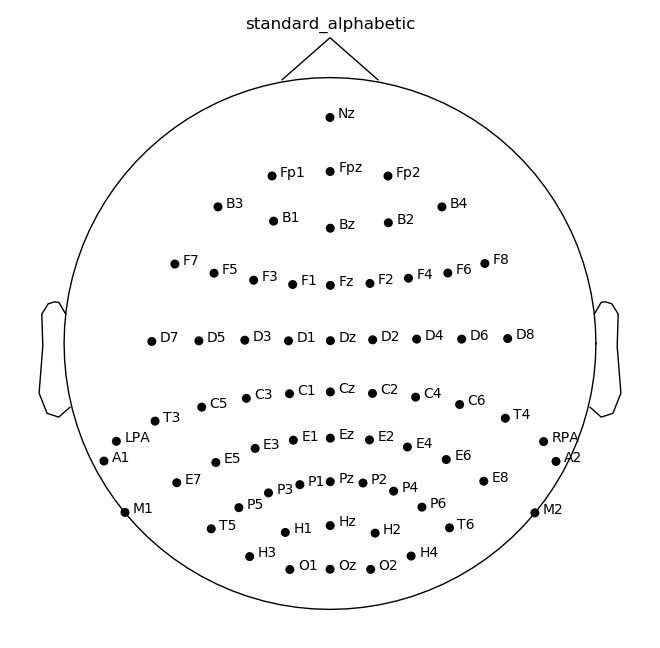

In [92]:
print(mne.channels.get_builtin_montages())
montage = mne.channels.read_montage("standard_alphabetic")
montage.plot()

In [84]:
raw.info["ch_names"]

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

In [85]:
raw.set_montage(montage, set_dig=True)

<RawArray  |  None, n_channels x n_times : 19 x 58820 (235.3 sec), ~8.6 MB, data loaded>

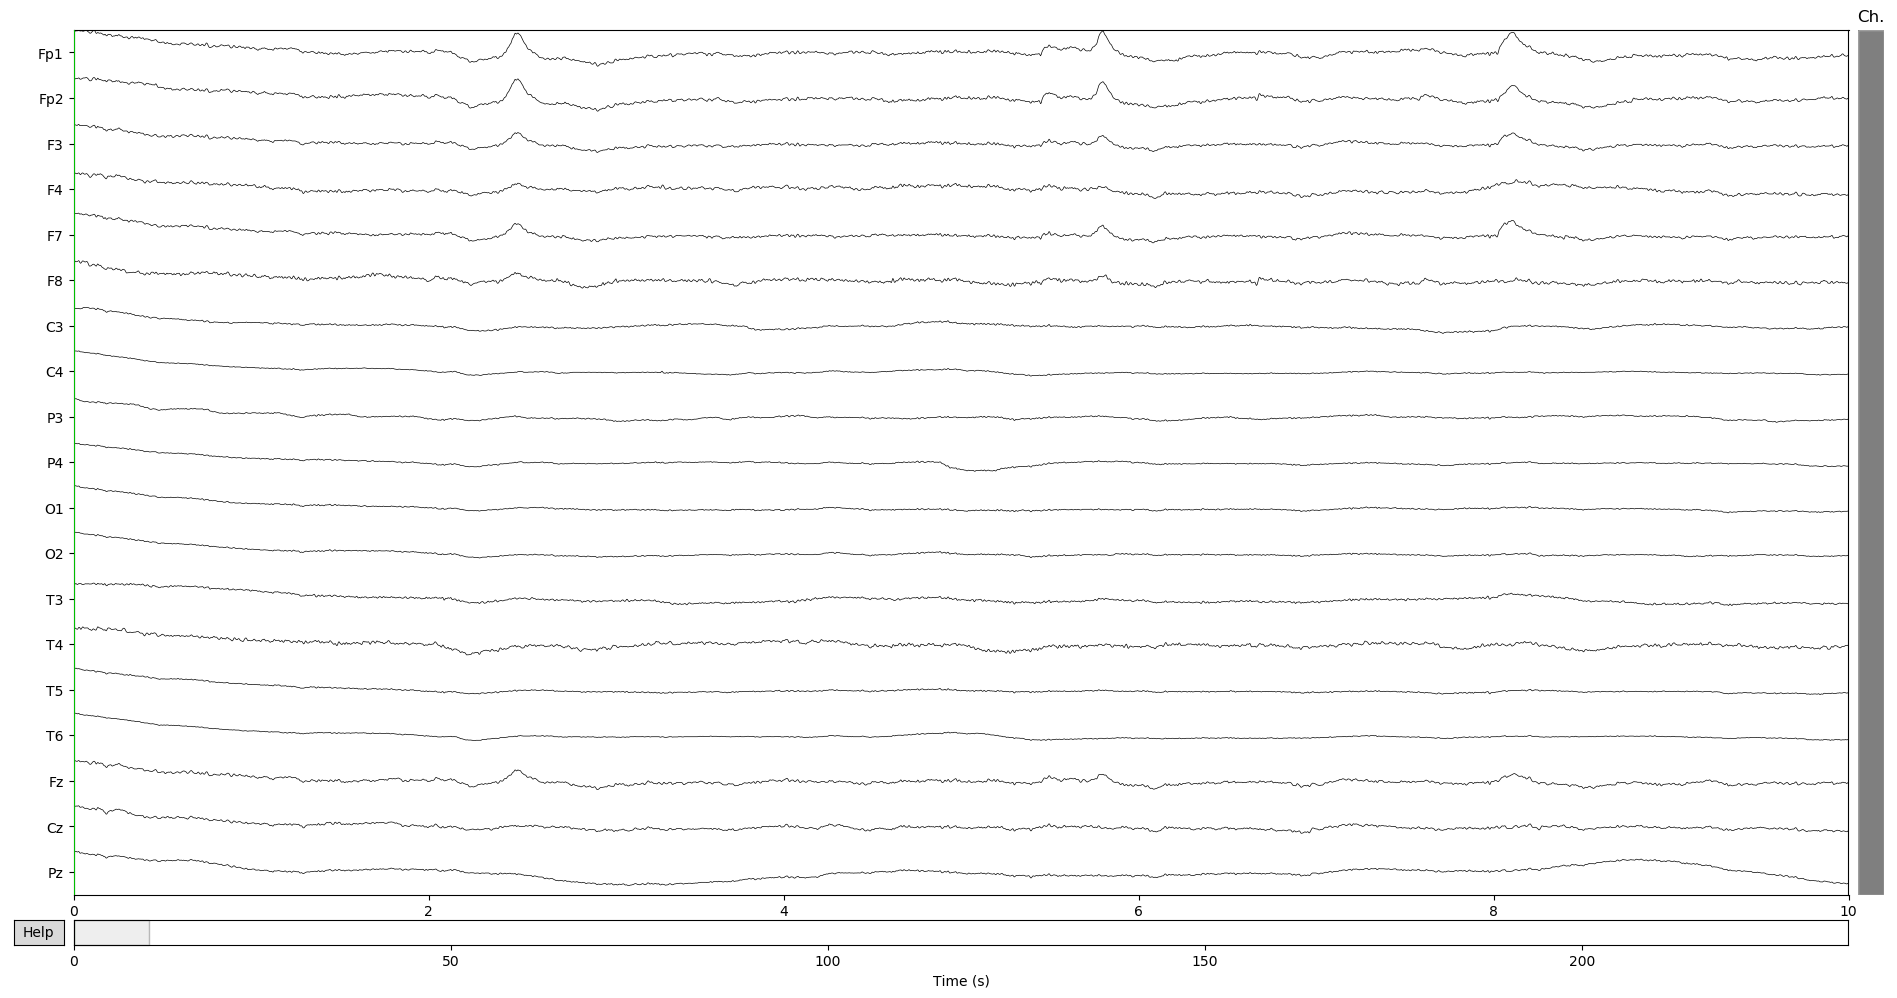

In [93]:
scalings = {'eeg': 0.1}
raw.plot(scalings=scalings)

In [104]:
# event_data = pd.read_csv("/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/test_events.csv", index_col=False, usecols=[1], skiprows=[0], names=["stim"])
# event_data
event_data = np.genfromtxt('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/test_events.csv', delimiter=',').transpose()
print(event_data)

[0. 0. 1. ... 0. 0. 0.]


In [105]:
sfreq = 250

event_info = mne.create_info(['stim'], sfreq, ch_types="stim")

events = mne.io.RawArray(event_data, event_info)

ValueError: Data must be a 2D array of shape (n_channels, n_samples), got shape (58820,)

In [112]:
mne_events = mne.find_events(events, consecutive=True)

233 events found
Event IDs: [1 2]


In [113]:
import matplotlib.pyplot as plt
plt.plot(mne_events.data[1])

NotImplementedError: multi-dimensional sub-views are not implemented